## Welcome!

This is my first note book using siamese network following a video on youtube where a paper code was built in real time

Link to paper: https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf 

Link to video: https://www.youtube.com/watch?v=LKispFFQ5GU

###  1.0 SET UP

#### 1.1 Install Dependecies

In [ ]:
# !pip install tensorflow==2.5 tensorflow-gpu==2 opencv-python matplotlib

In [4]:
!pip install matplotlib opencv-python

#### 1.2 Import Dependencies

In [96]:
#Import Standard Libraries
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [97]:
#Import tensorflow helpers. We are using functional API for this work

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

#### 1.3 Set GPU Growth

In [98]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [99]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


#### 1.4 Create Folder Structure

In [100]:
'''
Siamese network works with positive, negative and anchor images, so we need
to create different folders for them. Also, I have created a folder for this project
and all other needed folders will be created in the same directory as this notebook.
'''

#set up paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [6]:
#create the folders for the directory
#os.makedirs(POS_PATH)
#os.makedirs(NEG_PATH)
#os.makedirs(ANC_PATH)

### 2. Collect Images

#### 2.1 Get negatives
The negative images to be used are the labelled face images in the wild dataset

In [17]:
# http://vis-www.cs.umass.edu/lfw/ download the required dataset from the link

In [18]:
# the images are in a tar kind of file and need to be unzipped

!tar -xf lfw.tgz

In [19]:
# to move the lfw images to the file created for negative images
for dir in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', dir)):
        N_PATH = os.path.join('lfw', dir, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(N_PATH, NEW_PATH)

#### 2.2 Collect positive and anchor images from webcam

In [7]:
#import unique image identifier library to generate unique names for images
import uuid

In [8]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
#type of id to be generated for a image

'data\\anchor\\d6e1336e-5907-11ec-9c8f-34e12df0dfab.jpg'

In [34]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    #collect anchors
    #collect positives
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        


In [35]:
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

(480, 640, 3)


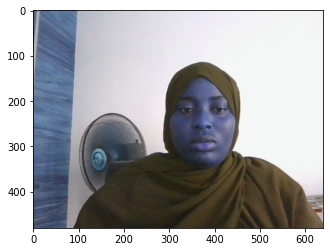

In [37]:
plt.imshow(frame) 
#the image generated here is 480 by 640 which is larger thean the size of 
# the negatives we have. So we are going to cut the dimensions of the images
#we are generating for our positives and anchors to be 250 by 250

print(frame.shape)

In [38]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    #cut down the shape of the images
    frame = frame[120:120+250, 200:200+250] #length by width dimension
    
    #collect anchors
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #create anchor image path
        img_name= os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write the image
        cv2.imwrite(img_name, frame)
       
    #collect positives
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('p'):
         #create anchor image path
        img_name= os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write the image
        cv2.imwrite(img_name, frame)
        
    # Show image back to screen
    cv2.imshow('Image Collection', frame)q
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

#### 2.3 Perform Data Augmentation
This is meant to create more data samples of different image qualities

In [82]:
def data_augment(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta = 0.02, seed = (1,2)) #add images with differing brightness
        img = tf.image.stateless_random_contrast(img, lower = 0.6, upper = 1, seed = (1,3))
        img = tf.image.stateless_random_flip_left_right(img, seed = (np.random.randint(100), np.random.randint(150)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality = 80, max_jpeg_quality = 100, seed = (123, 456))
        img = tf.image.stateless_random_saturation(img, lower= 0.8, upper = 1, seed = (np.random.randint(100), np.random.randint(100)))
         
        #add the generated images to data
        data.append(img)
        
    return data   


In [85]:
"""
#i am commenting through this to avoid rerunning this cell and not create extra images than i previously had

# effect the changes in the images
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_augment(img)
    
    #add the augmented images for positive into the positive file
    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())
                    

#DO THE SAME ON THE ANCHOR IMAGES
for file_name in os.listdir(os.path.join(ANC_PATH)):
    img_path = os.path.join(ANC_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_augment(img)
    
    #add the augmented images for anchor into the anchor file
    for image in augmented_images:
        cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())
"""

"\n# effect the changes in the images\nfor file_name in os.listdir(os.path.join(POS_PATH)):\n    img_path = os.path.join(POS_PATH, file_name)\n    img = cv2.imread(img_path)\n    augmented_images = data_augment(img)\n    \n    #add the augmented images for positive into the positive file\n    for image in augmented_images:\n        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())\n                    \n\n#DO THE SAME ON THE ANCHOR IMAGES\nfor file_name in os.listdir(os.path.join(ANC_PATH)):\n    img_path = os.path.join(ANC_PATH, file_name)\n    img = cv2.imread(img_path)\n    augmented_images = data_augment(img)\n    \n    #add the augmented images for anchor into the anchor file\n    for image in augmented_images:\n        cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())\n"

### 3. Load and Preprocess Images

#### 3.1 Get image directories

In [101]:
#take same amount of data(3000) from all image class

anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(3000)

#### 3.2 Preprocess the images

In [102]:
# define a function to do that
def preprocess(file_path):
    #read the image from the path
    byte_img = tf.io.read_file(file_path)
    #load the image
    img = tf.io.decode_jpeg(byte_img)
    
    #resize the images to 100 *100
    img = tf.image.resize(img, (100,100))
    #scale
    img = img /255.0
    
    return img

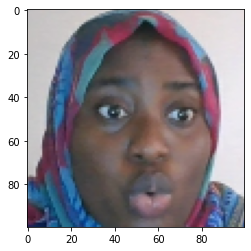

In [103]:
#one example
im = preprocess('data\\positive\\5b4115ed-575a-11ec-90f6-34e12df0dfab.jpg')

plt.imshow(im)

#### 3.3 Create labelled dataset

In [104]:
#match a positive with an anchor and takes value of 1 since it the same person
#match negative and anchor and that will take a 0 since the two people wouldnt match

#images that match
positives = tf.data.Dataset.zip((anchor,positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
#images that wouldnot match
negatives = tf.data.Dataset.zip((anchor,negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))

#join the dataset
data = positives.concatenate(negatives)

In [105]:
samp = data.as_numpy_iterator()

samp.next()

(b'data\\anchor\\2624e3b7-5759-11ec-98cf-34e12df0dfab.jpg',
 b'data\\positive\\e80e9ed8-575f-11ec-b3b5-34e12df0dfab.jpg',
 1.0)

#### 3.4 Build Train and Test Set

In [106]:
#define a function that will take the labelled pair images and do preprocessing

def twin_preprocess(input_img, val_img, label):
    return(preprocess(input_img), preprocess(val_img), label)#preprocess only the images

In [107]:
#build the pipeline
data = data.map(twin_preprocess) #call the function on the whole data
data = data.cache() #cache the data
data = data.shuffle(buffer_size =10000) #to ensure mixed data

In [108]:
len(data)

6000

In [109]:
# define train size and images
train_data = data.take(round(len(data)*.7)) #take 70 percent of the data as train set
train_data = train_data.batch(32)
train_data =train_data.prefetch(8)

In [110]:
# define test size and images
test_data = data.skip(round(len(data)*.7)) #skip the ones taken as train set
#take 30 percent of the data as test set
test_data = data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

### 4. Model Building

#### 4.1 Build Embeding Layer

In [111]:
# We are using the functional Keras API

#define the model
def make_embedding():
    inp = Input(shape=(100,100,3), name= 'input_image') #input image with size 100*100 and 3 color channels

    #first convolution block with Concv2d layer and maxpooling layer
    c1 = Conv2D(64, (10, 10), activation = 'relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding = 'same')(c1)

    #Second convolution block
    c2 = Conv2D(128, (7, 7), activation = 'relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding = 'same')(c2)

    #third convolution block
    c3 = Conv2D(128, (4, 4), activation = 'relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding = 'same')(c3)

    #fouth convolution block
    c4 = Conv2D(256, (4, 4), activation = 'relu')(m3)
    #add flatten layer
    f1= Flatten()(c4)
    #add a dense layer
    d1= Dense(4096, activation= 'sigmoid')(f1)

    return Model(inputs=[inp], outputs = [d1], name= 'embedding')




In [112]:
embed_model = make_embedding() #assign the function to a variable

embed_model.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)         0 

#### 4.2 Build the Distance Layer

In [113]:
#we are making a difference of the two layers

#build custom layer
class L1Dist(Layer):
    def __init__(self, **kwargs): #kwargs allows you to work on this as part of a bigger layer
        super().__init__() #inheritance
    
    #magic happens, the call tells this layer what to do when some data is passed
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)#perfoms the diffrence between the two passed layers(images)

In [114]:
#checkout
l1 = L1Dist()

l1

#### 4.3 Build Siamese Model

In [115]:
input_image = Input(name = 'input_img', shape = (100,100,3)) #input image size
validation_image = Input(name = 'val_img', shape = (100, 100, 3)) #validation image size

In [116]:
#build the two different models that makes up the siamese network by calling 
#the defined fuction for the two expected models

inp_embedding = embed_model(input_image)# input image embedding layer
val_embedding = embed_model(validation_image) #validation image embedding layer

In [117]:
siamese_layer = L1Dist() #the siamese custom  layer

distances = siamese_layer(inp_embedding, val_embedding) #the distance layer

In [118]:
#build the final(output layer) of the whole network

classifier = Dense(1, activation = 'sigmoid')(distances)

In [119]:
#bag the full network

siamese_network = Model(inputs= [input_image, validation_image], outputs = classifier, name = 'SiameseNetwork')

In [28]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
val_img (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 val_img[0][0]                    
__________________________________________________________________________________________________
l1_dist_4 (L1Dist)              (None, 4096)         0           embedding[0][0]     

#### 5. Training

#### 5.1 Setup Loss and Optimizer

In [122]:
# loss

cross_loss = tf.losses.BinaryCrossentropy()

#optimizer
opt = tf.keras.optimizers.Adam(1e-4)

#### 5.2 Establish Checkpoint

In [123]:
#ModelCheckpoint callback is used in conjunction with training using model.fit () to save a model or weights (in a checkpoint file) at some interval, 
#so the model or weights can be loaded later to continue the training from the state saved.

checkpoint_directory = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_directory, 'ckpt')

checkpoint = tf.train.Checkpoint(opt = opt, siamese_model = siamese_network)

#### 5.3 Build Train Step Function

In [124]:
@tf.function #this decorator compiles the function into a callable tensorflow graph
def train_step(batch):
    
    #record all of the operations
    with tf.GradientTape() as tape: #records operation for automatic differentiation (allows for backpropagation)
        #get anchor and positive/negative image
        X = batch[:2] #the images
        # get label
        y= batch[2]
        
        #forward pass
        ypred = siamese_network(X, training = True) #call the model on the images
        #calculate loss
        loss = cross_loss(y, ypred) #difference between the predicted and the original 
        #loss has been defined earlier as binary cross entropy
    print(loss)
    
    #calculate gradients
    gradient = tape.gradient(loss, siamese_network.trainable_variables)
    
    #calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(gradient, siamese_network.trainable_variables))
        
    return loss

#### 5.4 Build training loop

In [125]:
#Import metric calc
from tensorflow.keras.metrics import Precision, Recall

#define training function
def train(data, EPOCHS):
    #loop through each epoch
    for epoch in range( 1, EPOCHS+1):
        print('\ Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        #create metrics object
        r = Recall()
        p = Precision()
        
        #loop through each batch
        for idx, batch in enumerate(data):
            #run train step
            loss = train_step(batch)
            ypred = siamese_network.predict(batch[:2])
            r.update_state(batch[2], ypred)
            p.update_state(batch[2], ypred)
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        #save checkpoint
        if epoch % 10 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)
            

#### 5.5 Train the Model

In [126]:
#define number of epochs
EPOCHS = 20

#call train function on the training data
train(train_data, EPOCHS)

\ Epoch 1/20
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
132/132 [==============================] - 496s 4s/step
0.014753301 0.9297246 0.9929006
\ Epoch 2/20
132/132 [==============================] - 488s 4s/step
0.18340003 0.98768353 0.9938036
\ Epoch 3/20
132/132 [==============================] - 481s 4s/step
0.07725433 0.9952245 0.9966523
\ Epoch 4/20
132/132 [==============================] - 481s 4s/step
0.42267329 0.99810874 0.9990535
\ Epoch 5/20
132/132 [==============================] - 472s 4s/step
0.012422234 0.99904805 0.9943155
\ Epoch 6/20
132/132 [==============================] - 473s 4s/step
9.429128e-05 0.99906015 0.99906015
\ Epoch 7/20
132/132 [==============================] - 468s 4s/step
0.55025816 0.99952173 0.9971374
\ Epoch 8/20
132/132 [==============================] - 466s 4s/step
0.010847308 0.9928058 0.98759544
\ Epoch 9/20
132/132 [============

KeyboardInterrupt: 

### 6. Evaluate Model

#### 6.1 Import Metrics

In [127]:
#Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

#### 6.2 Make Predictions

In [128]:
#get a batch from the test data

test_inp, test_val, y_true = test_data.as_numpy_iterator().next()

In [129]:
y_pred = siamese_network.predict([test_inp, test_val])

print(y_true)
y_pred =  [1 if prediction > 0.5 else 0 for prediction in y_pred ]
print(y_pred)

[0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
[0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1]


#### 6.3 Calculate Metrics

In [130]:
#recall
re = Recall()
#precision
pre = Precision()

for test_inp, test_val, y_true in test_data.as_numpy_iterator():
    ypred = siamese_network.predict([test_inp, test_val])
    re.update_state(y_true, ypred)
    pre.update_state(y_true, ypred)

#return reacll result
print(re.result().numpy(), pre.result().numpy())

1.0 1.0


#### 6.4 Visual result

1.0
[0.99998224]


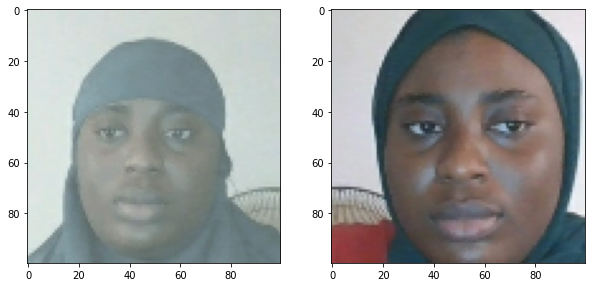

In [131]:
#plot images

#set plot size
plt.figure(figsize=(10,10))

#suboplot
#first
plt.subplot(1,2,1)
plt.imshow(test_inp[0])

#second
plt.subplot(1,2,2)
plt.imshow(test_val[0])

print(y_true[0]) #print true label value
print(ypred[0]) #print predicted label value

### 7. Save Model

In [132]:
#siamese network

siamese_network.save('siamesemodelv1.h5')

In [133]:
#to reload model

siamese_model = tf.keras.models.load_model('siamesemodelv1.h5',
                                    custom_objects= {'L1Dist': L1Dist, 'BinaryCrossentropy': tf.losses.BinaryCrossentropy})

In [136]:
# Make predictions with reloaded model
siamese_model.predict([test_inp, test_val])

array([[9.9998224e-01],
       [2.3019204e-08],
       [2.4272111e-04],
       [1.2387206e-07],
       [9.9916732e-01],
       [9.9999881e-01],
       [9.9583095e-01],
       [8.5320053e-06]], dtype=float32)

In [137]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
val_img (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 val_img[0][0]                    
__________________________________________________________________________________________________
l1_dist_5 (L1Dist)              (None, 4096)         0           embedding[0][0]     

### 8. Real Time Test

#### 8.1 Verification function

In [138]:
# create new path for verification data and iterate through it

for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\ec283bd6-575f-11ec-83f1-34e12df0dfab.jpg
application_data\verification_images\ec288add-575f-11ec-9f51-34e12df0dfab.jpg
application_data\verification_images\ec288ade-575f-11ec-ac8a-34e12df0dfab.jpg
application_data\verification_images\ec29a1b5-575f-11ec-bfea-34e12df0dfab.jpg
application_data\verification_images\ec46c11a-575f-11ec-9dec-34e12df0dfab.jpg
application_data\verification_images\ec46c11b-575f-11ec-817a-34e12df0dfab.jpg
application_data\verification_images\ec88bc36-575f-11ec-b06b-34e12df0dfab.jpg
application_data\verification_images\ec8b1e60-575f-11ec-953f-34e12df0dfab.jpg
application_data\verification_images\ec8b1e61-575f-11ec-8cb9-34e12df0dfab.jpg
application_data\verification_images\ecafc6a5-575f-11ec-8d71-34e12df0dfab.jpg
application_data\verification_images\ecafc6a6-575f-11ec-8de6-34e12df0dfab.jpg
application_data\verification_images\ecb0b7be-575f-11ec-b4ac-34e12df0dfab - Copy.jpg
application_data\verification_images\eccb903a-575f-11ec-a

In [153]:
#define function to build verification image and verify

def verify(model, detection_threshold, verification_threshold):
    #build result
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        #make prediction
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    #detection threshold is metric above which a prediction is considered positive
    detection = np.sum(np.array(results) > detection_threshold)
    #verification threshold: proportion of positive predictions/total positve samples
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
    verified = verification > verification_threshold
                                                           
    return results, verified

#### 8.2 Real time Verification with OpenCV

In [154]:
#open camera
cap = cv2.VideoCapture(0)

#open capture loop
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250, 200:200+250, :]
    
    cv2.imshow('verification', frame)
    
    #verification trigger
    if cv2.waitKey(1) & 0xFF == ord('v'):
        #add to path
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        #run verification
        results, verified = verify(siamese_model, 0.99, 0.5)
        print('Person is Verified' if verified == True else 'Person Not Verified')
    #cancel trigger
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Person Not Verified
Person is Verified


Person is Verified
True


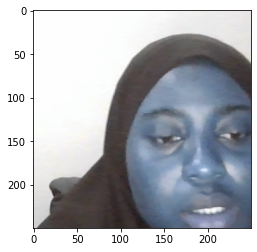

In [156]:
plt.imshow(frame)

cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        #run verification
results, verified = verify(siamese_model, 0.99, 0.8)
print('Person is Verified' if verified == True else 'Person is Not Verified')
print(verified)